Weight: 30 AUC LogREG (k-fold): 0.6403498249601742
Weight: 31 AUC LogREG (k-fold): 0.6403402201001581
Weight: 32 AUC LogREG (k-fold): 0.6403478822815367
Weight: 33 AUC LogREG (k-fold): 0.6403410052777407
Weight: 34 AUC LogREG (k-fold): 0.640350277816128
Weight: 35 AUC LogREG (k-fold): 0.6403568822792571
Weight: 36 AUC LogREG (k-fold): 0.6403548350118473
Weight: 37 AUC LogREG (k-fold): 0.6403709862402459
Weight: 38 AUC LogREG (k-fold): 0.640374517939558
Weight: 39 AUC LogREG (k-fold): 0.6403703665266681
Weight: 40 AUC LogREG (k-fold): 0.6403759436026515
Weight: 41 AUC LogREG (k-fold): 0.6403762430066988
Weight: 42 AUC LogREG (k-fold): 0.6403812317595821
Weight: 43 AUC LogREG (k-fold): 0.6403867311255376
Weight: 44 AUC LogREG (k-fold): 0.6403800840406915
Weight: 45 AUC LogREG (k-fold): 0.6403848401855108
Weight: 46 AUC LogREG (k-fold): 0.6403830685398295
Weight: 47 AUC LogREG (k-fold): 0.6403946925635947
Weight: 48 AUC LogREG (k-fold): 0.6403899348509279
Weight: 49 AUC LogREG (k-fold): 0

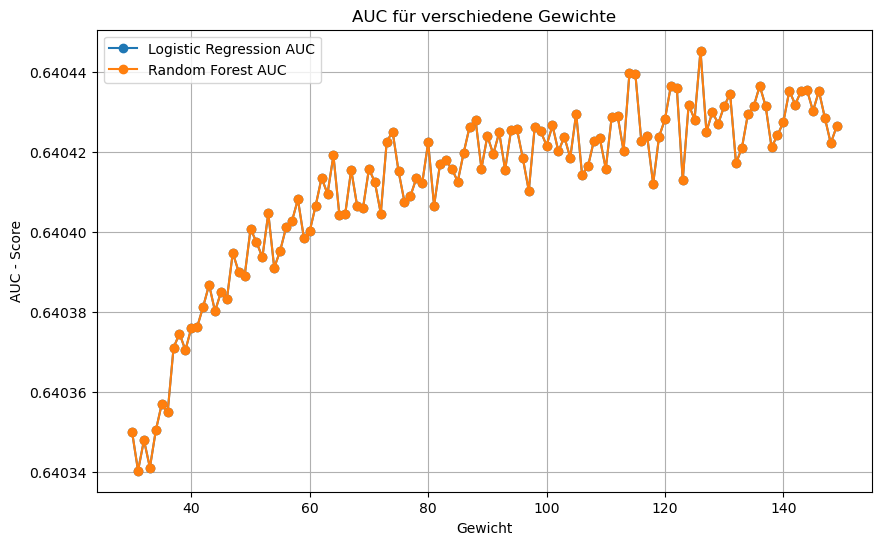

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
df = pd.read_csv('GeneralDatensatz18-21ohneGeo-mitLockdown_mitCorona.csv', sep=';')

X=df[['UMONAT','USTUNDE','UWOCHENTAG','UART','USTRZUSTAND','BEZ','UTYP1','ULICHTVERH','IstRad','IstPKW','IstFuss','IstKrad','IstGkfz','IstSonstige', 'LOCKDOWN', 'COVID']]

#für tödliche und schwere vs. leichte Unfälle
y = df['UKATEGORIE'].isin([1, 2]).astype(int)
# -> 1 ist schwer oder tödlich, 0 ist leicht

# KFold-Konfiguration
kf = KFold(n_splits=5, shuffle=True, random_state=42)

import matplotlib.pyplot as plt

# Leere Listen für F1-Scores
f1_scores_log_reg = []
f1_scores_rf = []
roc_scores_log_reg = []
roc_scores_rf = []

weights = range(30, 150)
beta = 2
fbeta_scorer= make_scorer(fbeta_score, beta=beta)

for i in weights:
    # Logistische Regression
    log_reg = LogisticRegression(max_iter=1000, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
    # f1_reg = cross_val_score(log_reg, X, y, cv=kf, scoring=fbeta_scorer)
    roc_auc_reg = cross_val_score(log_reg, X, y, cv=kf, scoring='roc_auc')
    #print(f"Weight: {i} F1 Score Logistische Regression (k-fold): { f1_reg.mean()}")
    
   # f1_scores_log_reg.append(f1_reg.mean())
    roc_scores_log_reg.append(roc_auc_reg.mean())
    
   
    

    # Random Forest
    rf_clas = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=42, class_weight={0:1, 1: i})

    # F1-Score berechnen und speichern
   # f1_rf = cross_val_score(rf_clas, X, y, cv=kf, scoring=fbeta_scorer)
    roc_auc_rf = cross_val_score(log_reg, X, y, cv=kf, scoring='roc_auc')
    print(f"Weight: {i} AUC LogREG (k-fold): { roc_auc_reg.mean()}")

   # f1_scores_rf.append(f1_rf.mean())
    roc_scores_rf.append(roc_auc_rf.mean())
    
# F1-Scores plotten
plt.figure(figsize=(10, 6))
#plt.plot(weights, f1_scores_log_reg, marker='o', label='Logistic Regression Fbeta')
# plt.plot(weights, f1_scores_rf, marker='o', label='Random Forest Fbeta')
plt.plot(weights, roc_scores_log_reg, marker='o', label='Logistic Regression AUC')
plt.plot(weights, roc_scores_rf, marker='o', label='Random Forest AUC')
plt.title('AUC für verschiedene Gewichte')
plt.xlabel('Gewicht')
plt.ylabel('AUC - Score')
plt.legend()
plt.grid(True)
plt.show()